requests.csv

This file contains the information for all requests for URLs to
be delisted from Web Search results for copyright violations. The information is
organized by the unique request ID for each copyright removal request, the date
(in UTC) that the request was received (in ISO 8601 format), the URL to the Lumen
page documenting the request, the ID number of a unique copyright owner, the
name of the copyright owner associated with the request, the ID number of the
unique reporting organization, the name of the reporting organization associated
with the request, the number of URLs that were specified in the request that
were removed, the number of URLs that were specified in the request that were
not present in Google's Search Index, the number of URLs that were specified
in the request but not removed, the number of URLs that were specified in the
request that are still pending review, and a value indicating if we believe
that the request was from someone we believe to be abusing the process.





domains.csv

This file contains the information for all domains which had a URL requested to
be delisted from Web Search results for copyright violations. The information is
organized by the unique request ID for each copyright removal request, the
normalized domain specified within the request, the number of URLs that were
specified in the request that were removed, the number of URLs that were
specified in the request that were not present in Google's Search index,
the number of URLs that were specified in the request but not removed, the
number of URLs that were specified in the request that are still pending
review, and a value indicating if we believe that the request was from someone
we believe to be abusing the process.





urls-no-action-taken.csv

This file contains the information for all URLs requested to be delisted from
Web Search results for copyright violations for which we took no action on the
request. The information is organized by the unique request ID for each
copyright removal request, the normalized domain specified within the request, a
URL that was specified in the request but not removed, and a value indicating if
we believe that the request was from someone we believe to be abusing the
process.


See https://transparencyreport.google.com/copyright/overview for more
information.


In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.getcwd())

C:\Users\Syndra Hua\google_copyright


In [3]:
print(os.listdir("./google-websearch-copyright-removals/"))

['domains.csv', 'README.txt', 'requests.csv', 'urls-no-action-taken.csv']


In [4]:
# Domain data
#chunksize = 10 ** 6
#for chunk in pd.read_csv("./google-websearch-copyright-removals/requests.csv", chunksize=chunksize):
#    process(chunk)
request = pd.read_csv("./google-websearch-copyright-removals/requests.csv")
print('data shape: ', request.shape)

data shape:  (7378423, 12)


In [5]:
request['Request ID'].nunique()

7378423

In [6]:
request['Lumen URL'].nunique()

7378201

In [7]:
request.head(n=20)

,Request ID,Date,Lumen URL,Copyright owner ID,Copyright owner name,Reporting organization ID,Reporting organization name,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser
0,1,2012-05-23T21:59:06Z,http://www.chillingeffects.org/notice.cgi?sID=...,22818,BPI (British Recorded Music Industry) Ltd,1847,BPI (British Recorded Music Industry) Ltd,1,0,0,0,False
1,10,2011-12-07T09:22:01Z,http://www.chillingeffects.org/notice.cgi?sID=...,25445,SEOmoz.ir,2951,seomoz.ir,6,0,4,0,False
2,100,2012-04-28T09:11:10Z,http://www.chillingeffects.org/notice.cgi?sID=...,22818,BPI (British Recorded Music Industry) Ltd,1847,BPI (British Recorded Music Industry) Ltd,7,0,0,0,False
3,1000,2012-04-06T20:06:21Z,http://www.chillingeffects.org/notice.cgi?sID=...,33428,"Malibu Media, LLC",6913,"Malibu Media, LLC",1,0,0,0,False
4,10000,2012-02-08T10:12:54Z,http://www.chillingeffects.org/notice.cgi?sID=...,25224,Microsoft Corporation,34,Pulin Thakkar,995,0,2,0,False
5,100000,2011-08-16T11:09:59Z,http://www.chillingeffects.org/notice.cgi?sID=...,26456,Olga Soloveva,6101,Olga Soloveva,1,0,0,0,False
6,1000000,2014-02-01T12:33:12Z,http://www.chillingeffects.org/notice.cgi?sID=...,50275,Rob Papen Soundware VOF,9911,Link-Busters.com,12,0,1,0,False
7,1000001,2014-02-02T09:39:28Z,http://www.chillingeffects.org/notice.cgi?sID=...,39071,BPI LTD MEMBER COMPANIES,1847,BPI (British Recorded Music Industry) Ltd,783,0,3,0,False
8,1000002,2014-02-01T19:49:19Z,http://www.chillingeffects.org/notice.cgi?sID=...,22611,"Dreamroom Productions, Inc.",30833,"Dreamroom Productions, Inc.",795,0,2,0,False
9,1000003,2014-02-02T08:39:51Z,http://www.chillingeffects.org/notice.cgi?sID=...,45529,Silk Textures,17708,Topple Track,3,0,0,0,False


In [8]:
a = request[request['Copyright owner ID'] == 21932]
a

,Request ID,Date,Lumen URL,Copyright owner ID,Copyright owner name,Reporting organization ID,Reporting organization name,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser
1761202,258718,2012-07-20T07:20:42Z,http://www.chillingeffects.org/notice.cgi?sID=...,21932,GLOBUS-FILM LTD.,1559,Internet Copyright Management,232,0,11,0,False
1811309,263234,2012-07-24T09:11:28Z,http://www.chillingeffects.org/notice.cgi?sID=...,21932,GLOBUS-FILM LTD.,1559,Internet Copyright Management,127,0,0,0,False
1831041,265014,2012-07-26T06:33:52Z,http://www.chillingeffects.org/notice.cgi?sID=...,21932,GLOBUS-FILM LTD.,1559,Internet Copyright Management,371,0,12,0,False
1905361,271713,2012-07-31T14:33:59Z,http://www.chillingeffects.org/notice.cgi?sID=...,21932,GLOBUS-FILM LTD.,1559,Internet Copyright Management,457,0,17,0,False


In [9]:
request['From Abuser'].value_counts()

False    7328844
True       49579
Name: From Abuser, dtype: int64

In [10]:
request.columns

Index(['Request ID', 'Date', 'Lumen URL', 'Copyright owner ID',
       'Copyright owner name', 'Reporting organization ID',
       'Reporting organization name', 'URLs removed',
       'URLs that were not in Google's search index',
       'URLs for which we took no action', 'URLs pending review',
       'From Abuser'],
      dtype='object')

In [11]:
request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7378423 entries, 0 to 7378422
Data columns (total 12 columns):
Request ID                                     int64
Date                                           object
Lumen URL                                      object
Copyright owner ID                             int64
Copyright owner name                           object
Reporting organization ID                      int64
Reporting organization name                    object
URLs removed                                   int64
URLs that were not in Google's search index    int64
URLs for which we took no action               int64
URLs pending review                            int64
From Abuser                                    bool
dtypes: bool(1), int64(7), object(4)
memory usage: 626.3+ MB


In [12]:
request['From Abuser'] = request['From Abuser'].astype(int)

### Group by 'Copyright owner ID'

In [13]:
gb = request.groupby(['Copyright owner ID']).sum().reset_index()
gb.shape

(167955, 8)

In [14]:
gb.columns

Index(['Copyright owner ID', 'Request ID', 'Reporting organization ID',
       'URLs removed', 'URLs that were not in Google's search index',
       'URLs for which we took no action', 'URLs pending review',
       'From Abuser'],
      dtype='object')

In [15]:
gb.head(20)

,Copyright owner ID,Request ID,Reporting organization ID,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser
0,21931,148842,6037,0,0,1,0,0
1,21932,1058679,6236,1187,0,40,0,0
2,21933,28232,976,1,0,0,0,0
3,21934,4320389351,68875226,36661,324,5489,0,0
4,21935,433653,14118,0,0,91,0,0
5,21936,528115,18514,0,0,3,0,0
6,21937,6142732,204756,401,0,1443,0,0
7,21938,935922,34380,2,0,2,0,0
8,21939,429967,11836,59,0,16,0,0
9,21940,6120730,216771,1416,0,5475,0,0


In [16]:
b = (request.groupby('Copyright owner ID')
 .agg({'Request ID':'count',
       'URLs removed':'sum',
       "URLs that were not in Google's search index":'sum',
       'URLs for which we took no action':'sum',
       'URLs pending review':'sum',
       'From Abuser':'sum'})
 .reset_index()
 .rename(columns={'Request ID':'count'})
)
#b.sort_values(['From Abuser'], ascending = [False])
b.shape

(167955, 7)

In [17]:
b['% abuser'] = b['From Abuser']/b['count']
b['Total urls'] = b.iloc[:,2:6].sum(axis=1)
b['% remove'] = round( b['URLs removed']/b['Total urls'] * 100,2)
b['% no action'] = round( b['URLs for which we took no action']/b['Total urls'] * 100,2)
b.sort_values(['URLs pending review'], ascending = [False])

,Copyright owner ID,count,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser,% abuser,Total urls,% remove,% no action
119082,212840,7373,235263,131740,44228,7539,0,0.000000,418770,56.18,10.56
73190,163907,3000,2968564,352934,534980,3870,0,0.000000,3860348,76.90,13.86
71500,162088,1631,431876,73030,162831,2125,0,0.000000,669862,64.47,24.31
58108,83790,2485,200660,247112,121221,2092,0,0.000000,571085,35.14,21.23
111855,205243,86,23389,1135,22353,1890,32,0.372093,48767,47.96,45.84
94262,186662,12794,315887,281525,33325,1292,0,0.000000,632029,49.98,5.27
153988,250154,175,45237,102864,5962,1053,0,0.000000,155116,29.16,3.84
167846,266370,1,0,0,0,1000,0,0.000000,1000,0.00,0.00
167791,266310,3,0,16,24,957,0,0.000000,997,0.00,2.41
20301,43106,3358,931,248,618633,954,0,0.000000,620766,0.15,99.66


### Group by 'Reporting organization ID'

In [18]:
rp = request.groupby(['Reporting organization ID']).sum().reset_index()
rp.shape

(153800, 8)

In [51]:
c = (request.groupby('Reporting organization ID')
 .agg({'Request ID':'count',
       'URLs removed':'sum',
       "URLs that were not in Google's search index":'sum',
       'URLs for which we took no action':'sum',
       'URLs pending review':'sum',
       'From Abuser':'sum'})
 .reset_index()
 .rename(columns={'Request ID':'count'})
)
#c.sort_values(['From Abuser'], ascending = [False])
c.shape

(153800, 7)

In [52]:
c['Total urls'] = c.iloc[:,2:6].sum(axis=1)
c['% abuser'] = c['From Abuser']/c['count']
c['% remove'] = round( c['URLs removed']/c['Total urls'] * 100,2)
c['% not in google'] = round( c["URLs that were not in Google's search index"]/c['Total urls'] * 100,2)
c['% no action'] = round( c['URLs for which we took no action']/c['Total urls'] * 100,2)
c.sort_values(['% no action','Total urls'], ascending = [False,False])

,Reporting organization ID,count,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser,Total urls,% abuser,% remove,% not in google,% no action
28885,34543,166,5,0,116365,0,166,116370,1.0,0.0,0.0,100.0
19066,23480,34,0,0,21980,0,34,21980,1.0,0.0,0.0,100.0
102078,174199,19,0,0,13598,0,19,13598,1.0,0.0,0.0,100.0
19090,23508,21,0,0,13226,0,21,13226,1.0,0.0,0.0,100.0
102013,174133,18,0,0,12726,0,18,12726,1.0,0.0,0.0,100.0
101991,174110,18,0,0,12719,0,18,12719,1.0,0.0,0.0,100.0
101977,174095,18,0,0,12717,0,18,12717,1.0,0.0,0.0,100.0
101968,174086,18,0,0,12671,0,18,12671,1.0,0.0,0.0,100.0
101950,174068,18,0,0,12668,0,18,12668,1.0,0.0,0.0,100.0
101982,174100,18,0,0,12642,0,18,12642,1.0,0.0,0.0,100.0


In [53]:
c.head(10)

,Reporting organization ID,count,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser,Total urls,% abuser,% remove,% not in google,% no action
0,0,2,1,0,7,0,0,8,0.0,12.50,0.0,87.50
1,1,4,4,0,0,0,0,4,0.0,100.00,0.0,0.00
2,2,5,85,0,20,0,0,105,0.0,80.95,0.0,19.05
3,3,2,2,0,0,0,0,2,0.0,100.00,0.0,0.00
4,4,1,0,0,2,0,0,2,0.0,0.00,0.0,100.00
5,5,1,4,0,0,0,0,4,0.0,100.00,0.0,0.00
6,6,3,2,0,1,0,0,3,0.0,66.67,0.0,33.33
7,7,2,3,0,0,0,0,3,0.0,100.00,0.0,0.00
8,8,10,262,0,5,0,0,267,0.0,98.13,0.0,1.87
9,9,9,14,0,10,0,0,24,0.0,58.33,0.0,41.67


In [54]:
abuser_1 = c[c['% abuser'] == 1.0]
abuser_1.shape

(3890, 12)

In [55]:
abuser_1['% no action'].value_counts()

100.00    2392
0.00       233
50.00       29
66.67       25
99.99       25
99.90       16
33.33       15
12.50       12
25.00        9
75.00        9
99.80        8
80.00        7
99.96        6
20.00        6
88.89        5
14.29        5
99.98        4
87.50        4
60.00        4
11.11        4
37.50        4
62.50        4
40.00        4
57.14        4
90.31        4
35.71        4
85.71        4
7.14         4
4.17         3
5.56         3
          ... 
82.93        1
97.34        1
96.97        1
14.58        1
94.42        1
8.82         1
76.76        1
65.06        1
92.11        1
28.77        1
10.46        1
89.91        1
72.89        1
63.60        1
64.74        1
60.34        1
13.83        1
83.57        1
75.36        1
99.91        1
99.58        1
54.90        1
95.90        1
34.88        1
90.06        1
12.66        1
64.73        1
62.16        1
0.10         1
90.67        1
Name: % no action, Length: 940, dtype: int64

In [23]:
request[request['Reporting organization ID'] == 11836]

,Request ID,Date,Lumen URL,Copyright owner ID,Copyright owner name,Reporting organization ID,Reporting organization name,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser
10,1000004,2014-02-01T10:42:12Z,http://www.chillingeffects.org/notice.cgi?sID=...,38241,New State Music,11836,AudioLock.NET,66,0,0,0,0
12,1000006,2014-02-02T09:05:32Z,http://www.chillingeffects.org/notice.cgi?sID=...,45762,OXYGEN,11836,AudioLock.NET,10,0,0,0,0
13,1000007,2014-02-02T08:53:44Z,http://www.chillingeffects.org/notice.cgi?sID=...,24240,Toolroom Records,11836,AudioLock.NET,6,0,0,0,0
14,1000008,2014-02-01T17:17:15Z,http://www.chillingeffects.org/notice.cgi?sID=...,56153,Tapas recordings,11836,AudioLock.NET,2,0,0,0,0
17,1000010,2014-02-01T16:50:11Z,http://www.chillingeffects.org/notice.cgi?sID=...,24240,TOOLROOM RECORDS,11836,AudioLock.NET,10,0,0,0,0
21,1000014,2014-02-01T18:36:34Z,http://www.chillingeffects.org/notice.cgi?sID=...,35790,Atlantic,11836,AudioLock.NET,5,0,2,0,0
22,1000015,2014-02-01T19:49:19Z,http://www.chillingeffects.org/notice.cgi?sID=...,25108,Extra Dry,11836,AudioLock.NET,1,0,0,0,0
23,1000016,2014-02-01T23:29:54Z,http://www.chillingeffects.org/notice.cgi?sID=...,29183,Metal & Dust Records,11836,AudioLock.NET,1,0,0,0,0
25,1000018,2014-02-02T03:17:14Z,http://www.chillingeffects.org/notice.cgi?sID=...,38241,New State Music,11836,AudioLock.NET,367,0,2,0,0
26,1000019,2014-02-01T17:13:47Z,http://www.chillingeffects.org/notice.cgi?sID=...,54284,Enormous Tunes,11836,AudioLock.NET,4,0,1,0,0


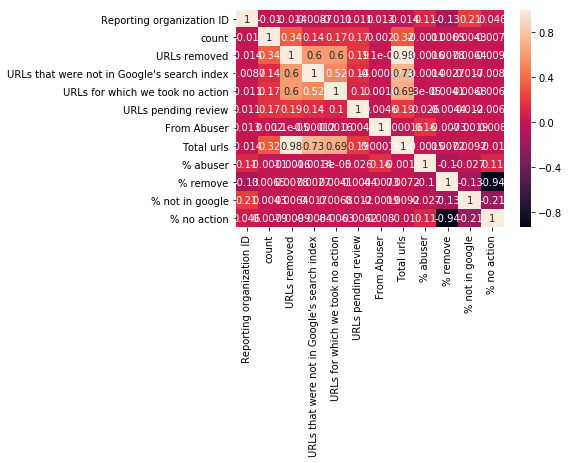

In [24]:
Var_Corr = c[2:].corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [25]:
request['year'] = pd.DatetimeIndex(request['Date']).year
request['month'] = pd.DatetimeIndex(request['Date']).month
request['day'] = pd.DatetimeIndex(request['Date']).day

In [26]:
request['year'] = request['year'].astype(str)
request['month'] = request['month'].astype(str)
request['year_month'] = request['year'] + "-" + request['month']

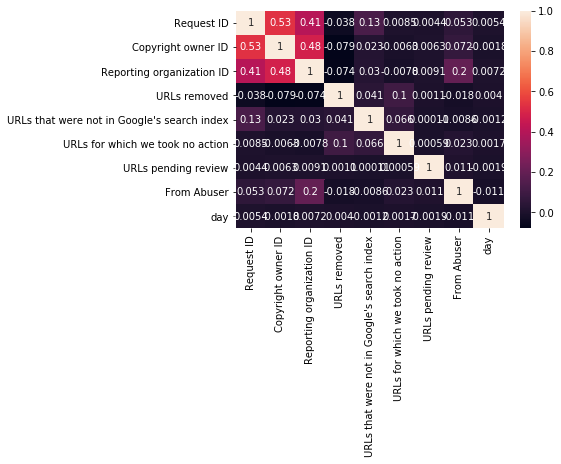

In [27]:
Var_Corr = request.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [28]:
request.head()

,Request ID,Date,Lumen URL,Copyright owner ID,Copyright owner name,Reporting organization ID,Reporting organization name,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser,year,month,day,year_month
0,1,2012-05-23T21:59:06Z,http://www.chillingeffects.org/notice.cgi?sID=...,22818,BPI (British Recorded Music Industry) Ltd,1847,BPI (British Recorded Music Industry) Ltd,1,0,0,0,0,2012,5,23,2012-5
1,10,2011-12-07T09:22:01Z,http://www.chillingeffects.org/notice.cgi?sID=...,25445,SEOmoz.ir,2951,seomoz.ir,6,0,4,0,0,2011,12,7,2011-12
2,100,2012-04-28T09:11:10Z,http://www.chillingeffects.org/notice.cgi?sID=...,22818,BPI (British Recorded Music Industry) Ltd,1847,BPI (British Recorded Music Industry) Ltd,7,0,0,0,0,2012,4,28,2012-4
3,1000,2012-04-06T20:06:21Z,http://www.chillingeffects.org/notice.cgi?sID=...,33428,"Malibu Media, LLC",6913,"Malibu Media, LLC",1,0,0,0,0,2012,4,6,2012-4
4,10000,2012-02-08T10:12:54Z,http://www.chillingeffects.org/notice.cgi?sID=...,25224,Microsoft Corporation,34,Pulin Thakkar,995,0,2,0,0,2012,2,8,2012-2


### Group by 'year_month'

In [29]:
d = (request.groupby('year_month')
 .agg({'Request ID':'count',
       'URLs removed':'sum',
       "URLs that were not in Google's search index":'sum',
       'URLs for which we took no action':'sum',
       'URLs pending review':'sum',
       'From Abuser':'sum'})
 .reset_index()
 .rename(columns={'Request ID':'count'})
)
d.shape

(97, 7)

In [30]:
d.sort_values(['year_month'], ascending = [True])

,year_month,count,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser
0,2011-10,4671,456538,0,35381,0,9
1,2011-11,6443,713906,0,43957,0,12
2,2011-12,8926,752858,0,75649,0,27
3,2011-3,1,44,0,1,0,0
4,2011-4,18,601,0,393,0,0
5,2011-5,66,1224,0,122,0,0
6,2011-6,2821,62893,0,16993,0,0
7,2011-7,3451,252188,0,26005,0,6
8,2011-8,4174,475471,0,30824,0,15
9,2011-9,4916,482158,0,40164,0,43


In [31]:
d.iloc[:,2:6].head(10)

,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review
0,456538,0,35381,0
1,713906,0,43957,0
2,752858,0,75649,0
3,44,0,1,0
4,601,0,393,0
5,1224,0,122,0
6,62893,0,16993,0
7,252188,0,26005,0
8,475471,0,30824,0
9,482158,0,40164,0


In [32]:
d['Total urls'] = d.iloc[:,2:6].sum(axis=1)
d['% abuser'] = d['From Abuser']/d['count']
d['% remove'] = round( d['URLs removed']/d['Total urls'] * 100,2)
d['% not in google'] = round( d["URLs that were not in Google's search index"]/d['Total urls'] * 100,2)
d['% no action'] = round( d['URLs for which we took no action']/d['Total urls'] * 100,2)
d.sort_values(['% no action','Total urls'], ascending = [False,False]).head(10)

,year_month,count,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser,Total urls,% abuser,% remove,% not in google,% no action
4,2011-4,18,601,0,393,0,0,994,0.000000,60.46,0.0,39.54
19,2012-7,48345,3404901,0,1095835,0,78,4500736,0.001613,75.65,0.0,24.35
74,2017-2,82377,65763202,0,18266147,78,331,84029427,0.004018,78.26,0.0,21.74
6,2011-6,2821,62893,0,16993,0,0,79886,0.000000,78.73,0.0,21.27
64,2016-4,112742,76365896,0,17233824,376,392,93600096,0.003477,81.59,0.0,18.41
12,2012-11,27498,9665455,0,1883235,0,179,11548690,0.006510,83.69,0.0,16.31
46,2015-1,78266,28624388,0,5083964,1,23,33708353,0.000294,84.92,0.0,15.08
63,2016-3,105648,72705594,0,11953195,74,537,84658863,0.005083,85.88,0.0,14.12
70,2017-1,103032,65408452,0,10631074,0,302,76039526,0.002931,86.02,0.0,13.98
75,2017-3,92540,78306668,0,12138520,2,714,90445190,0.007716,86.58,0.0,13.42


In [33]:
d.to_csv('request_groupby_time.csv')

### Domain.csv 

In [34]:
domain_chunks = pd.read_csv('./google-websearch-copyright-removals/domains.csv',iterator = True)

In [35]:
from collections import defaultdict

top_level_freq = defaultdict(int)
top_level_URLs_removed = defaultdict(int)
top_level_no_go = defaultdict(int)
top_level_no_go = defaultdict(int)
top_level_no_ac = defaultdict(int)
top_level_pd = defaultdict(int)
top_level_fa = defaultdict(int)
owner = defaultdict(lambda: defaultdict(int))

In [39]:
while True:
    domain = domain_chunks.get_chunk(10000)
    for row in domain.iterrows():
        cur_top = row[1][1].split(".")[1]
        rq_id = row[1][0]
        rq_dt = request[request["Request ID"] == rq_id]
        a,b,c,d = (rq_dt["URLs removed"].values[0],rq_dt["URLs that were not in Google's search index"].values[0],
                   rq_dt["URLs for which we took no action"].values[0],rq_dt["URLs pending review"].values[0])
        top_level_URLs_removed[cur_top] += a
        top_level_no_go[cur_top] += b
        top_level_no_ac[cur_top] += c
        top_level_pd[cur_top] += d
        top_level_fa[cur_top] += int(rq_dt["From Abuser"].values[0])
        owner[rq_dt["Copyright owner name"].values[0]][cur_top] += (a+b+c+d)
    if len(domain) < 10000:
        break
    

IndexError: list index out of range

In [40]:
for row in domain.iterrows():
    cur_top = row[1][1].split(".")[1]
    rq_id = row[1][0]
    rq_dt = request[request["Request ID"] == rq_id]
    a,b,c,d = (rq_dt["URLs removed"].values[0],rq_dt["URLs that were not in Google's search index"].values[0],
               rq_dt["URLs for which we took no action"].values[0],rq_dt["URLs pending review"].values[0])
    top_level_URLs_removed[cur_top] += a
    top_level_no_go[cur_top] += b
    top_level_no_ac[cur_top] += c
    top_level_pd[cur_top] += d
    top_level_fa[cur_top] += int(rq_dt["From Abuser"].values[0])
    owner[rq_dt["Copyright owner name"].values[0]][cur_top] += (a+b+c+d)

IndexError: list index out of range

In [41]:
top_level_URLs_removed

defaultdict(int,
            {'net': 10920,
             'ee': 1560,
             'com': 25740,
             'tv': 780,
             'in': 2340,
             'zapto': 780,
             'nl': 4680,
             'org': 9360,
             'at': 780,
             'si': 1560,
             'ca': 3120,
             'eu': 3900,
             'name': 780,
             'ws': 780,
             'me': 1560,
             'co': 3900,
             'de': 780,
             'ch': 1560,
             'im': 780,
             'cl': 780,
             'so': 1560,
             'info': 3120,
             'lu': 780,
             'se': 1560,
             'ie': 780,
             'fr': 780,
             'ru': 780,
             'lv': 780,
             'st': 780,
             'su': 780,
             'tn': 780,
             'biz': 780,
             'al': 780,
             'li': 780,
             'pw': 780,
             'sytes': 780,
             'servebeer': 780})

In [42]:
top_level_no_ac

defaultdict(int,
            {'net': 0,
             'ee': 0,
             'com': 0,
             'tv': 0,
             'in': 0,
             'zapto': 0,
             'nl': 0,
             'org': 0,
             'at': 0,
             'si': 0,
             'ca': 0,
             'eu': 0,
             'name': 0,
             'ws': 0,
             'me': 0,
             'co': 0,
             'de': 0,
             'ch': 0,
             'im': 0,
             'cl': 0,
             'so': 0,
             'info': 0,
             'lu': 0,
             'se': 0,
             'ie': 0,
             'fr': 0,
             'ru': 0,
             'lv': 0,
             'st': 0,
             'su': 0,
             'tn': 0,
             'biz': 0,
             'al': 0,
             'li': 0,
             'pw': 0,
             'sytes': 0,
             'servebeer': 0})

In [43]:
top_level_pd

defaultdict(int,
            {'net': 0,
             'ee': 0,
             'com': 0,
             'tv': 0,
             'in': 0,
             'zapto': 0,
             'nl': 0,
             'org': 0,
             'at': 0,
             'si': 0,
             'ca': 0,
             'eu': 0,
             'name': 0,
             'ws': 0,
             'me': 0,
             'co': 0,
             'de': 0,
             'ch': 0,
             'im': 0,
             'cl': 0,
             'so': 0,
             'info': 0,
             'lu': 0,
             'se': 0,
             'ie': 0,
             'fr': 0,
             'ru': 0,
             'lv': 0,
             'st': 0,
             'su': 0,
             'tn': 0,
             'biz': 0,
             'al': 0,
             'li': 0,
             'pw': 0,
             'sytes': 0,
             'servebeer': 0})

In [44]:
top_level_fa

defaultdict(int,
            {'net': 0,
             'ee': 0,
             'com': 0,
             'tv': 0,
             'in': 0,
             'zapto': 0,
             'nl': 0,
             'org': 0,
             'at': 0,
             'si': 0,
             'ca': 0,
             'eu': 0,
             'name': 0,
             'ws': 0,
             'me': 0,
             'co': 0,
             'de': 0,
             'ch': 0,
             'im': 0,
             'cl': 0,
             'so': 0,
             'info': 0,
             'lu': 0,
             'se': 0,
             'ie': 0,
             'fr': 0,
             'ru': 0,
             'lv': 0,
             'st': 0,
             'su': 0,
             'tn': 0,
             'biz': 0,
             'al': 0,
             'li': 0,
             'pw': 0,
             'sytes': 0,
             'servebeer': 0})

In [45]:
owner['RIAA member companies (EMI Music North America, Sony Music Entertainment, Universal Music Group, Warner Music Group and their associated record labels)']

defaultdict(int, {})

In [46]:
domain

,Request ID,Domain,URLs removed,URLs that were not in Google's search index,URLs for which we took no action,URLs pending review,From Abuser
10000,1000432,audiko.net,1,0,0,0,False
10001,1000432,battleit.ee,4,0,0,0,False
10002,1000432,baymirror.com,4,0,0,0,False
10003,1000432,bayproxy.com,2,0,0,0,False
10004,1000432,beemp3.tv,1,0,0,0,False
10005,1000432,bich.in,4,0,0,0,False
10006,1000432,bugabuse.net,4,0,0,0,False
10007,1000432,campeche.zapto.org,4,0,0,0,False
10008,1000432,coevoet.nl,4,0,0,0,False
10009,1000432,cokemp3.org,1,0,0,0,False
